✅ Données simulées créées dans le DataFrame 'df'.


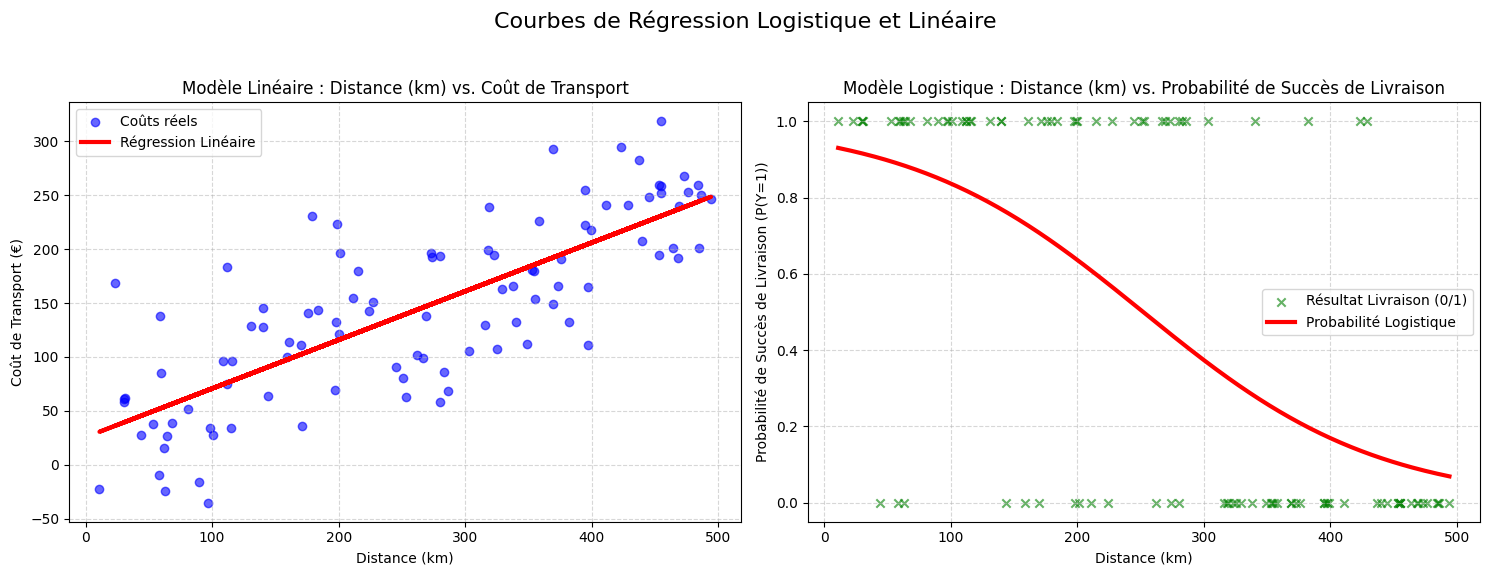


🎉 Les deux courbes devraient maintenant être affichées correctement et remplies.


In [41]:
# --- ÉTAPE 1 : INSTALLATION & IMPORTS NÉCESSAIRES ---
# Décommentez et exécutez la ligne suivante si vous n'avez pas encore les librairies :
# !pip install scikit-learn matplotlib pandas numpy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# --- ÉTAPE 2 : CRÉATION DES DONNÉES SIMULÉES ---
# Crée le DataFrame 'df' avec les données X (Distance), Y_Lin (Coût), Y_Log (Succès).
# Ceci garantit que 'df' est toujours défini et rempli, évitant les erreurs.

np.random.seed(42)
n_samples = 100

# 2.1. Initialisation de la variable df pour éviter les NameError
df = pd.DataFrame()

# 2.2. Création des variables
df['Distance_km'] = np.random.randint(10, 500, n_samples)
df['Cout_Transport'] = 10 + 0.5 * df['Distance_km'] + np.random.randn(n_samples) * 50

# 2.3. Création de la variable binaire Y (Logistique)
logistic_proba = 1 / (1 + np.exp(-(3 - 0.01 * df['Distance_km'])))
df['Livraison_Reussie'] = (logistic_proba > np.random.rand(n_samples)).astype(int)

print("✅ Données simulées créées dans le DataFrame 'df'.")

# --- ÉTAPE 3 : PRÉPARATION ET MODÈLES ---

# Préparation de la variable explicative (X)
X = df[['Distance_km']].values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 3.1. Modèle Linéaire
y_lin = df['Cout_Transport'].values
model_linear = LinearRegression()
model_linear.fit(X, y_lin)
y_lin_pred = model_linear.predict(X)

# 3.2. Modèle Logistique
y_log = df['Livraison_Reussie'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model_logistic = LogisticRegression()
model_logistic.fit(X_scaled, y_log)

# Calcul des points pour la courbe en S (Sigmoïde)
X_test = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
y_log_proba = model_logistic.predict_proba(X_test_scaled)[:, 1]

# --- ÉTAPE 4 : AFFICHAGE DES DEUX COURBES ---

# Création du conteneur (figure) et des deux sous-graphiques (axes[0] et axes[1])
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Courbes de Régression Logistique et Linéaire', fontsize=16)

# 4.1. AXE GAUCHE : Régression Linéaire
axes[0].scatter(X, y_lin, color='blue', alpha=0.6, label='Coûts réels')
axes[0].plot(X, y_lin_pred, color='red', linewidth=3, label='Régression Linéaire')
axes[0].set_title('Modèle Linéaire : Distance (km) vs. Coût de Transport')
axes[0].set_xlabel('Distance (km)')
axes[0].set_ylabel('Coût de Transport (€)')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# 4.2. AXE DROIT : Régression Logistique
axes[1].scatter(X, y_log, color='green', marker='x', alpha=0.6, label='Résultat Livraison (0/1)')
axes[1].plot(X_test, y_log_proba, color='red', linewidth=3, label='Probabilité Logistique')
axes[1].set_title('Modèle Logistique : Distance (km) vs. Probabilité de Succès de Livraison')
axes[1].set_xlabel('Distance (km)')
axes[1].set_ylabel('Probabilité de Succès de Livraison (P(Y=1))')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

# Affichage final
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n🎉 Les deux courbes devraient maintenant être affichées correctement et remplies.")